In [123]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
import math
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Data Preperation

In [124]:
# Data Import and Preparation
data = pd.read_csv('/content/Student_Performance.csv')

In [125]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [126]:
extracurricular_activities_unique_values = data['Extracurricular Activities'].unique()
extracurricular_activities_unique_values

array(['Yes', 'No'], dtype=object)

In [127]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [128]:
data

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [129]:
X_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values


# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform
X_train = scaler.fit_transform(X_train)

# Using Sklearn

In [130]:
# Create regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

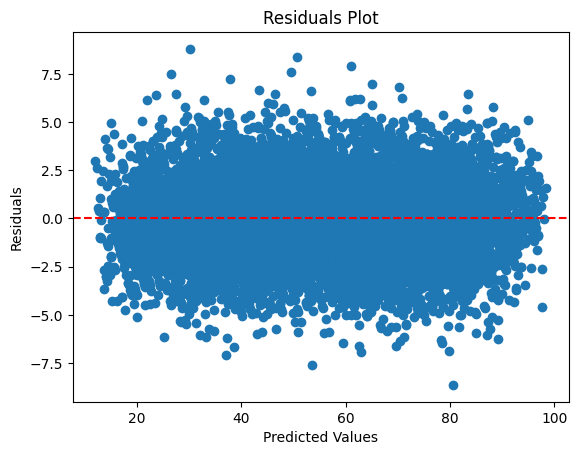

In [131]:
residuals = y_train - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [132]:
print("w: ", model.coef_)
print("b: ", model.intercept_)

w:  [ 7.38688215 17.66197609  0.30643222  0.81492275  0.55567035]
b:  55.2248


In [133]:
for i in range(5):
    print("Prediction: {:.2f}, Target value: {}".format(y_pred[i], y_train[i]))

Prediction: 91.85, Target value: 91.0
Prediction: 63.16, Target value: 65.0
Prediction: 45.05, Target value: 45.0
Prediction: 36.55, Target value: 36.0
Prediction: 67.09, Target value: 66.0


# Implementation from Scratch

In [134]:
# data is stored in numpy array/matrix
print('The shape of X_train: {}'.format(X_train.shape))
print(X_train[:5])
print('The shape of y_train: {}'.format(y_train.shape))
print(y_train[:5])

The shape of X_train: (10000, 5)
[[ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
 [-0.38348058  0.72391268 -0.98965352 -1.49229423 -0.90098215]
 [ 1.16141048 -1.06362569  1.01045465  0.27680507 -0.90098215]
 [ 0.00274218 -1.00596317  1.01045465 -0.90259446 -0.90098215]
 [ 0.77518771  0.32027498 -0.98965352  0.86650484  0.1453332 ]]
The shape of y_train: (10000,)
[91. 65. 45. 36. 66.]


In [135]:
b_init = 0
w_init = np.array([ 0, 0, 0, 0, 0])

print("w_init shape: {}".format(w_init))
print("b_init shape: {}".format(b_init))

w_init shape: [0 0 0 0 0]
b_init shape: 0


In [136]:
def predict(x, w, b):
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    return p

In [137]:
# get a row from our training data
x_vec = X_train[0,:]

print("x_vec shape: {}".format(x_vec.shape))
print("x_vec value: {}".format(x_vec))

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print("f_wb shape: {}".format(f_wb))

x_vec shape: (5,)
x_vec value: [ 0.77518771  1.70417565  1.01045465  1.45620461 -1.24975394]
f_wb shape: 0.0


In [138]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [139]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print('Cost for initial w and b : {}'.format(cost))

Cost for initial w and b : 1709.432


In [140]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [141]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print('dj_db at initial w,b: {}'.format(tmp_dj_db))
print('dj_dw at initial w,b: {}'.format(tmp_dj_dw))


dj_db at initial w,b: -55.2248
dj_dw at initial w,b: [ -7.17995694 -17.5822451   -0.4711634   -0.92418993  -0.83125366]


In [142]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print("Iteration {:4d}: Cost {:8.2f}   ".format(i, J_history[-1]))

    return w, b, J_history #return final w,b and J history for graphing

In [143]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1500
alpha = 0.008
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
m,_ = X_train.shape
preds = []
for i in range(m):
    preds.append(np.dot(X_train[i], w_final) + b_final)

Iteration    0: Cost  1682.24   
Iteration  150: Cost   153.32   
Iteration  300: Cost    15.69   
Iteration  450: Cost     3.30   
Iteration  600: Cost     2.19   
Iteration  750: Cost     2.09   
Iteration  900: Cost     2.08   
Iteration 1050: Cost     2.08   
Iteration 1200: Cost     2.08   
Iteration 1350: Cost     2.08   


In [144]:
print("w: ", w_final)
print("b: ", b_final)

w:  [ 7.38682121 17.66186391  0.30644251  0.81492731  0.55568758]
b:  55.224476672694536


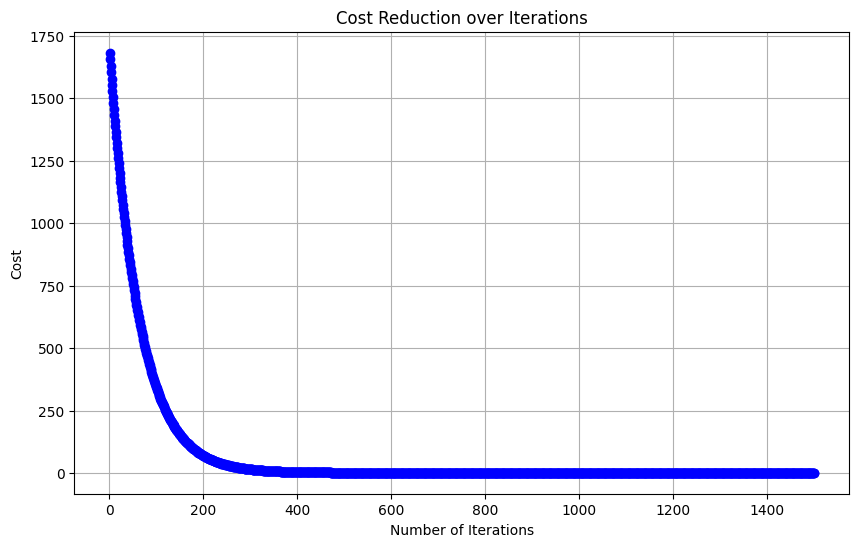

In [145]:
# Number of iterations
iterations = range(1, len(J_hist) + 1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(iterations, J_hist, marker='o', linestyle='-', color='b')
plt.title('Cost Reduction over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


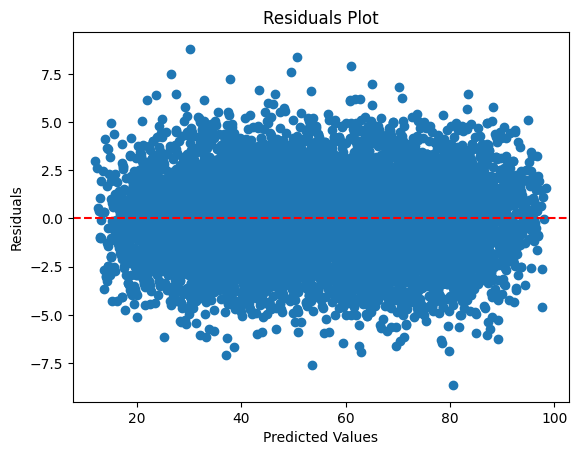

In [146]:
import matplotlib.pyplot as plt

residuals = y_train - preds
plt.scatter(preds, residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [148]:
for i in range(5):
  print("prediction: {}, target value: {}".format(preds[i], y_train[i]))

prediction: 91.85144259990021, target value: 91.0
prediction: 63.15737351429001, target value: 65.0
prediction: 45.05255362815955, target value: 45.0
prediction: 36.550980922951354, target value: 36.0
prediction: 67.09092921372604, target value: 66.0
